In [1]:
import sys
sys.path.append('../../../src')
from helpers import *
%matplotlib notebook

if not os.path.exists('Figs'):
    os.mkdir('Figs')

In [7]:
path_wt = data_path + 'Imaging/PAR-2 NEBD/210722_lp637_tom4,15,60/01'
path_gcn4 = data_path + 'Imaging/PAR-2 NEBD/220307_nwg481/00'

### Zoomed images: endosomes

<IPython.core.display.Javascript object>


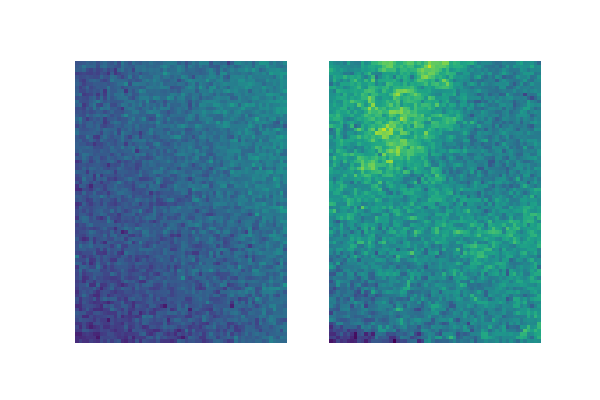

In [8]:
ybox_a = [70, 130]
xbox_a = [70, 150]

def func(path, ax):
    img = load_image(path + '/af_corrected.tif')
    roi = np.loadtxt(path + '/ROI.txt')
    rotated = rotated_embryo(img, roi, 250, 180, 3)
    rotated_box = rotated[xbox_a[0]:xbox_a[1], ybox_a[0]:ybox_a[1]]
    ax.imshow(rotated_box, cmap='viridis', vmin=0, vmax=13000)
    ax.axis('off')
    
fig, ax = plt.subplots(1, 2)
func(path_wt, ax[0])
func(path_gcn4, ax[1])
fig.set_size_inches(3, 2)
fig.savefig('Figs/imgs_endosomes_zoom.png', dpi=600, transparent=True)

### Zoomed images: anterior membrane

<IPython.core.display.Javascript object>


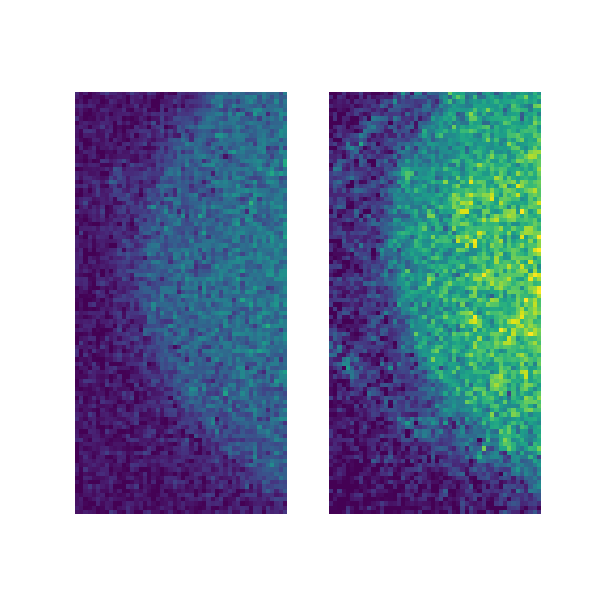

In [9]:
ybox_b = [10, 60]
xbox_b = [50, 150]

def func(path, ax):
    img = load_image(path + '/af_corrected.tif')
    roi = np.loadtxt(path + '/ROI.txt')
    rotated = rotated_embryo(img, roi, 250, 180, 3)
    rotated_box = rotated[xbox_b[0]:xbox_b[1], ybox_b[0]:ybox_b[1]]
    ax.imshow(rotated_box, cmap='viridis', vmin=0, vmax=8000)
    ax.axis('off')
    
fig, ax = plt.subplots(1, 2)
func(path_wt, ax[0])
func(path_gcn4, ax[1])
fig.set_size_inches(3, 3)
fig.savefig('Figs/imgs_anterior_zoom.png', dpi=600, transparent=True)

### Images with boxes

<IPython.core.display.Javascript object>


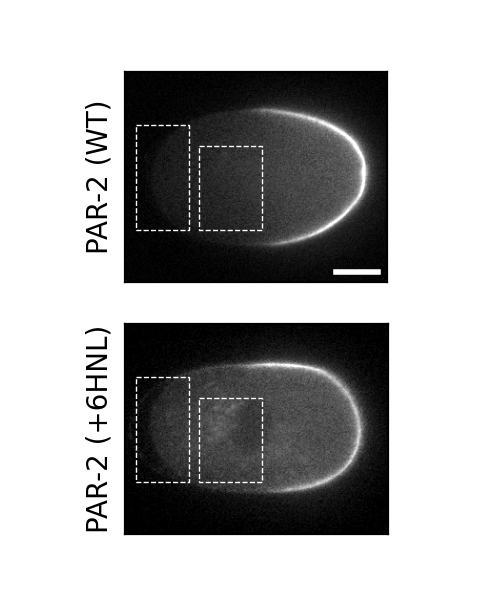

In [10]:
import matplotlib.patches as patches

def func_af(path, ax, scale_bar=False):
    img = load_image(path + '/af_corrected.tif')
    roi = np.loadtxt(path + '/ROI.txt')
    rotated = rotated_embryo(img, roi, 250, 200, 3)
    ax.imshow(rotated, cmap='gray', vmin=0, vmax=25000)
    ax.set_xticks([])
    ax.set_yticks([])
    
    # Endosome box
    recta = patches.Rectangle((ybox_a[0], xbox_a[0]), ybox_a[1] - ybox_a[0], xbox_a[1] - xbox_a[0], 
                         linewidth=0.5, edgecolor='w', facecolor='none', linestyle='--')
    ax.add_patch(recta)
    
    # Anterior membrane box
    rectb = patches.Rectangle((ybox_b[0], xbox_b[0]), ybox_b[1] - ybox_b[0], xbox_b[1] - xbox_b[0], 
                         linewidth=0.5, edgecolor='w', facecolor='none', linestyle='--')
    ax.add_patch(rectb)
    
    if scale_bar:
        px = 0.255 # pixel size
        bar_length = 10  # microns
        bar_pixels = bar_length / px
        y = rotated.shape[0] - 10
        ax.plot([rotated.shape[1]-10-bar_pixels, rotated.shape[1]-10], [y, y], color='w', linewidth=2)


fig, ax = plt.subplots(2, 1)
func_af(path_wt, ax[0], scale_bar=True)
func_af(path_gcn4, ax[1])
ax[0].set_ylabel('PAR-2 (WT)', fontsize=10)
ax[1].set_ylabel('PAR-2 (+6HNL)', fontsize=10)
fig.set_size_inches(2.5, 3)
fig.savefig('Figs/imgs.png', dpi=600, transparent=True)

<IPython.core.display.Javascript object>


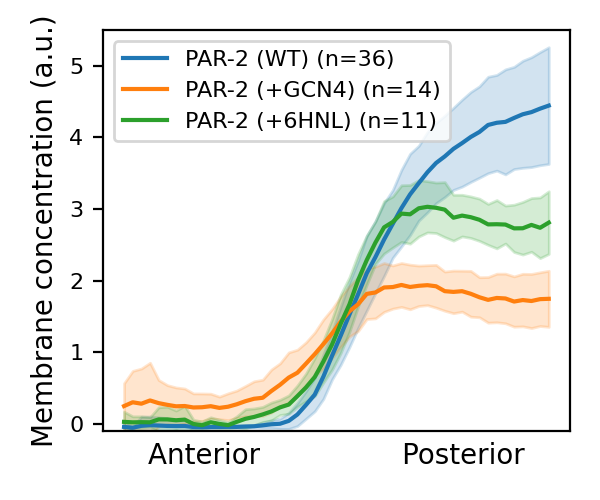

In [15]:
df = pd.read_csv('../../Raw analysis/PAR-2 NEBD quantification/NEBD_Embryos_dataframe.csv')
df = df[df.RNAi == 'wt']
df_quantification = pd.read_csv('../../Raw analysis/PAR-2 NEBD quantification/QUANTIFICATION.csv')

def fold(array):
    return (array[:50][::-1] + array[50:]) / 2

def func(line, ax, c, label):
    embryoIDs = df[df.Line == line].EmbryoID.to_list()
    df_quant_filtered = df_quantification[df_quantification.EmbryoID.isin(embryoIDs)]
    mems = df_quant_filtered.groupby('EmbryoID').apply(lambda x: interp_1d_array(x['Membrane signal'].to_numpy(), 
                                                                                 100))
    mems_ = np.array([fold(x) / 10000 for x in mems])
    mems_mean = np.mean(mems_, axis=0)
    mems_std = np.std(mems_, axis=0)
    ax.plot(mems_mean, c=c, label=label + ' (n=%s)'  % len(mems))
    ax.fill_between(np.arange(50), mems_mean - mems_std, mems_mean + mems_std, color=c, alpha=0.2)

   
fig, ax = plt.subplots()
func('lp637', ax, 'tab:blue', 'PAR-2 (WT)')
func('nwg376', ax, 'tab:orange', 'PAR-2 (+GCN4)')
func('nwg481', ax, 'tab:green', 'PAR-2 (+6HNL)')
ax.set_ylim(bottom=0)
ax.set_xlabel('Anterior                Posterior')
ax.set_ylabel('Membrane concentration (a.u.)')
ax.set_xticks([])
ax.set_ylim(-0.1, 5.5)
ax.tick_params(axis='x', labelsize=8)
ax.tick_params(axis='y', labelsize=8)
ax.legend(fontsize=8, loc='upper left')
fig.set_size_inches(3,2.5)
fig.tight_layout()
fig.savefig('Figs/conc_profile_wt_vs_6hnl.png', dpi=600, transparent=True)